# MATH 405/607 

# Chaos In The Context Of Dynamical Systems

Callum Hepworth, Sandy Luo, Jed Yeo


## Content

1) Introduction to Chaos Theory
2) Strange Attractor & Lorenz Problem
3) Popular Examples of Chaos
4) Studying Chaos Numerically

## Introduction

- Chaos theory 
    - "Study of random or unpredictable behaviour in systems governed by deterministic laws" [1]
    - Example: Pinball machine
- Applications
    - Turbulent flow
    - Chemical reactions
    - Planetary motion

- Dynamical systems
    - Highly sensitive to initial conditions
    - Behavior of dynamical chaotic systems appears random
    - This is not the case!

## Lorenz Heat Problem

- Chaos first observed by Edward Lorenz in 1963:
- The problem: atmospheric convection (three ODEs):

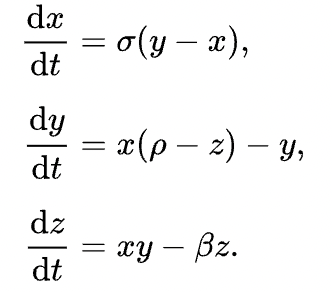

In [1]:
include("math405.jl")
using OrdinaryDiffEq, Plots
function lorenz(du,u,p,t)
    du[1] = 10.0*(u[2]-u[1])
    du[2] = u[1]*(28.0-u[3]) - u[2]
    du[3] = u[1]*u[2] - (8/3)*u[3]
end

lorenz (generic function with 1 method)

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


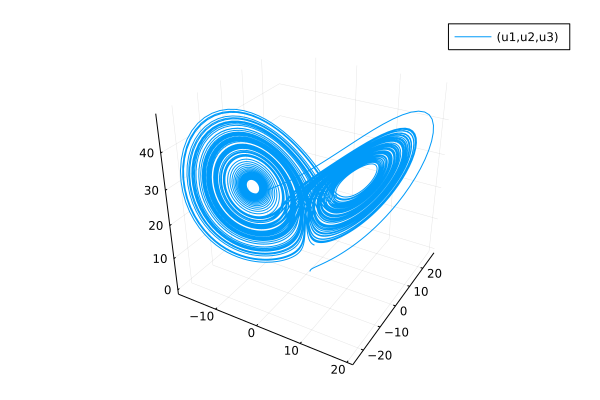

In [2]:
u0 = [-15.0;-15.0;20.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz,u0,tspan)
sol = solve(prob, Tsit5())
plot(sol,vars=(1,2,3))

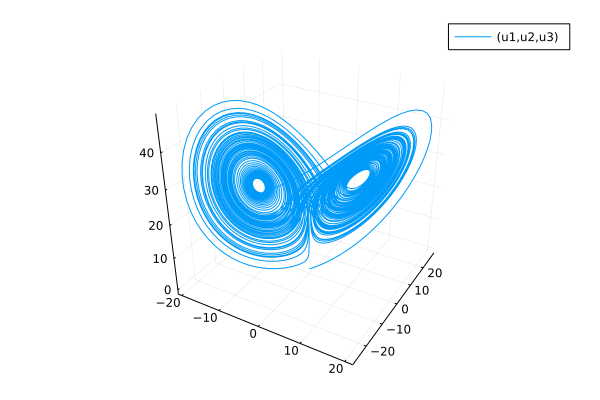

In [14]:
u1 = [-15.0;-15.0;20.0001]
prob = ODEProblem(lorenz,u1,tspan)
sol = solve(prob, Tsit5())
plot(sol,vars=(1,2,3))

## Strange Attractors

- Classical mechanics
    - Dynamical system's behavior can be described as motion on an “attractor".

In [4]:
z = 1

1

## Popular Examples of Chaos

i love examples

In [5]:
example = 0

0

## Studying Chaos Numerically

we study 

In [6]:
study = 6

6